In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 10]

In [4]:
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 배깅(Bagging)
```
- Bootstrap Aggregation. 앙상블 학습 방식 중 하나 
- 배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법
- 데이터로부터 부트스트랩(복원 랜덤 샘플링)을 하고 부트스트랩한 데이터로 모델을 학습. 학습된 모델의 결과를 집계하여 최종 결과 값을 구한다.
- Categorical Data는 투표 방식(Votinig)으로 결과를 집계하며, Continuous Data는 평균으로 집계.
- Categorical Data일 때, 투표 방식으로 한다는 것은 전체 모델에서 예측한 값 중 가장 많은 값을 최종 예측값으로 선정. 
- 6개의 결정 트리 모델일 경우 4개는 A로 예측했고, 2개는 B로 예측했다면 투표에 의해 4개의 모델이 선택한 A를 최종 결과로 예측한다
- 평균으로 집계한다는 것은 말 그대로 각각의 결정 트리 모델이 예측한 값에 평균을 취해 최종 Bagging Model의 예측값을 결정한다
- 배깅 기법을 활용한 모델이 바로 랜덤 포레스트  

```
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb4wG8O%2FbtqyfYW98AS%2FYZBtUJy3jZLyuik1R0aGNk%2Fimg.png' width='600'>

# 랜덤 포레스트(Random Forest)

- 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘. 
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 내린다.
- 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트인데 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트 스트래핑(bootstrapping) 분할 방식이라고 한다. 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fod2gM%2Fbtq6kMv83oZ%2FsNVWEiA7FWsB2BBt6kn0r1%2Fimg.png'
      width='500'>

### Random Forest 주요 파라미터 

n_estimators: 랜덤 포레스트 안의 결정 트리 갯수. 클수록 좋지만 메모리가 많이 소요됨. 
max_features: 무작위로 선택할 Feature의 개수



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [6]:
### 타이타닉 데이타셋

In [7]:
titanic_df = pd.read_csv('data/titanic_book.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
temp = encoder.transform(titanic_df['Sex'])
titanic_df['Sex'] = temp.reshape(-1, 1)

encoder.fit(titanic_df['Embarked'])
temp = encoder.transform(titanic_df['Embarked'])
titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
temp = encoder.transform(titanic_df['Cabin'])
titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [8]:
titanic_df.isnull().sum() # 결측치 확인

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [9]:
  # X y 설정
X_titanic_df = titanic_df.loc[:, 'Pclass':] 
y_titanic_df = titanic_df['Survived']

In [10]:
# 학습 데이타와 테스트 데이타로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=y_titanic_df)

In [11]:
X_train.shape, X_test.shape

((712, 8), (179, 8))

### DecesionTree 모델 적용과 테스트

In [12]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.7821229050279329

In [13]:
# 그리드 서치 적용 => max_depth : 3
model_dt = DecisionTreeClassifier()
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}
model_dt_grid = GridSearchCV(model_dt, param_grid=parameters, cv=5,  verbose=1)
model_dt_grid.fit(X_train, y_train)
model_dt_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 3}

In [14]:
model_dt = DecisionTreeClassifier(max_depth = 3)
model_dt.fit(X_train, y_train)
model_dt.score(X_train, y_train), model_dt.score(X_test, y_test) 

(0.8132022471910112, 0.8659217877094972)

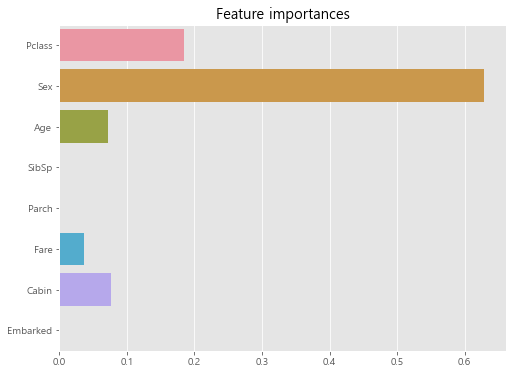

In [15]:
# 피처 중요도 Sex => Pclass
ftr_importances = pd.Series(model_dt.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

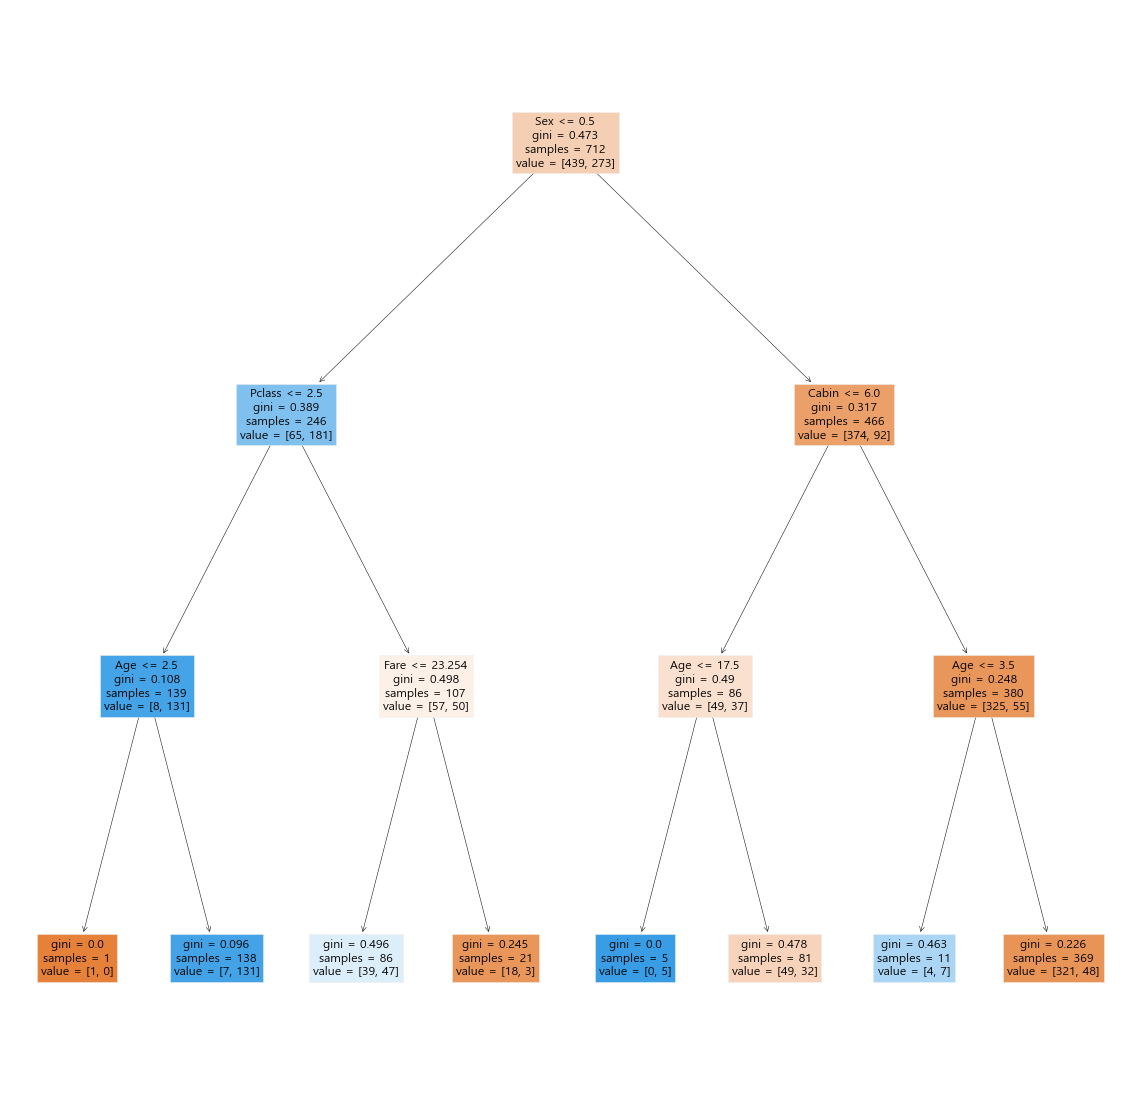

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model_dt, max_depth=3, filled=True, feature_names=X_train.columns, fontsize=12)
plt.show()

### Random Forest 적용

In [17]:
# n_estimators=100 기본값 
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8435754189944135

In [18]:
model_rf = RandomForestClassifier()
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}
model_rf_grid = GridSearchCV(model_rf, param_grid=parameters, cv=5,  verbose=1)
model_rf_grid.fit(X_train, y_train)
model_rf_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 10}

In [19]:
model_rf = RandomForestClassifier(max_depth = 8)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8435754189944135

In [20]:
model_rf.classes_ , model_rf.feature_importances_, X_train.columns

(array([0, 1], dtype=int64),
 array([0.09288817, 0.32846581, 0.15917009, 0.05097268, 0.0451902 ,
        0.20131125, 0.08609308, 0.03590871]),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object'))

In [21]:
importances_values = model_rf.feature_importances_
print(np.argsort(importances_values)[::-1])
X_train.columns[np.argsort(importances_values)[::-1][:]]

[1 5 2 0 6 3 4 7]


Index(['Sex', 'Fare', 'Age', 'Pclass', 'Cabin', 'SibSp', 'Parch', 'Embarked'], dtype='object')

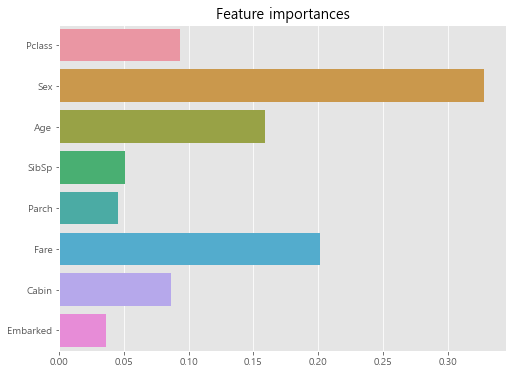

In [22]:
ftr_importances = pd.Series(model_rf.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

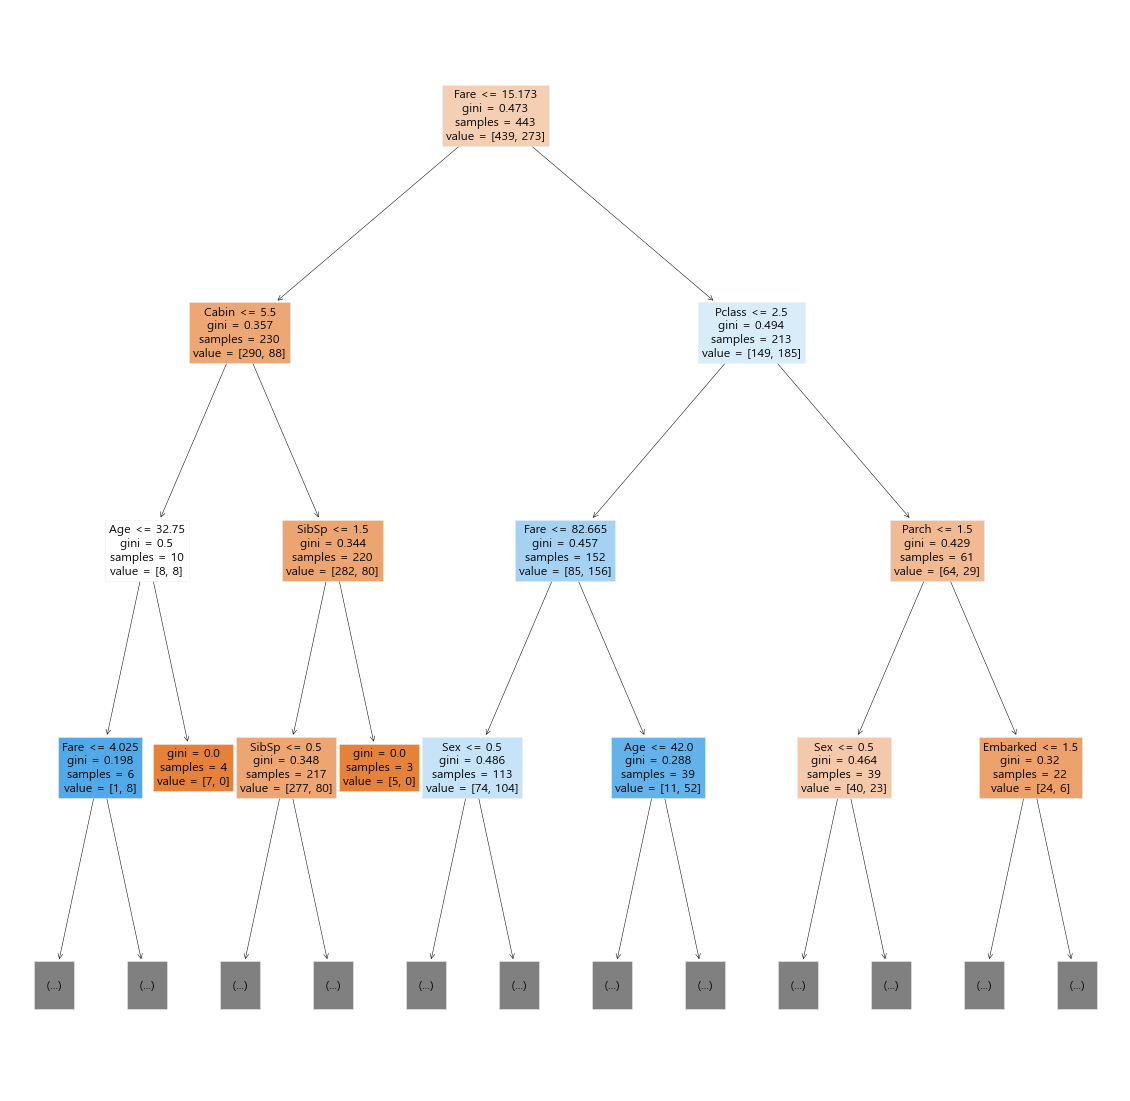

In [23]:
# 랜덤 포레스트 시각화 
# model_rf[0] ~ model_rf[n_estimators-1]
from sklearn.tree import plot_tree

# 첫번째 결정트리 
plt.figure(figsize=(20,20))
plot_tree(model_rf[0], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=12)
plt.show()

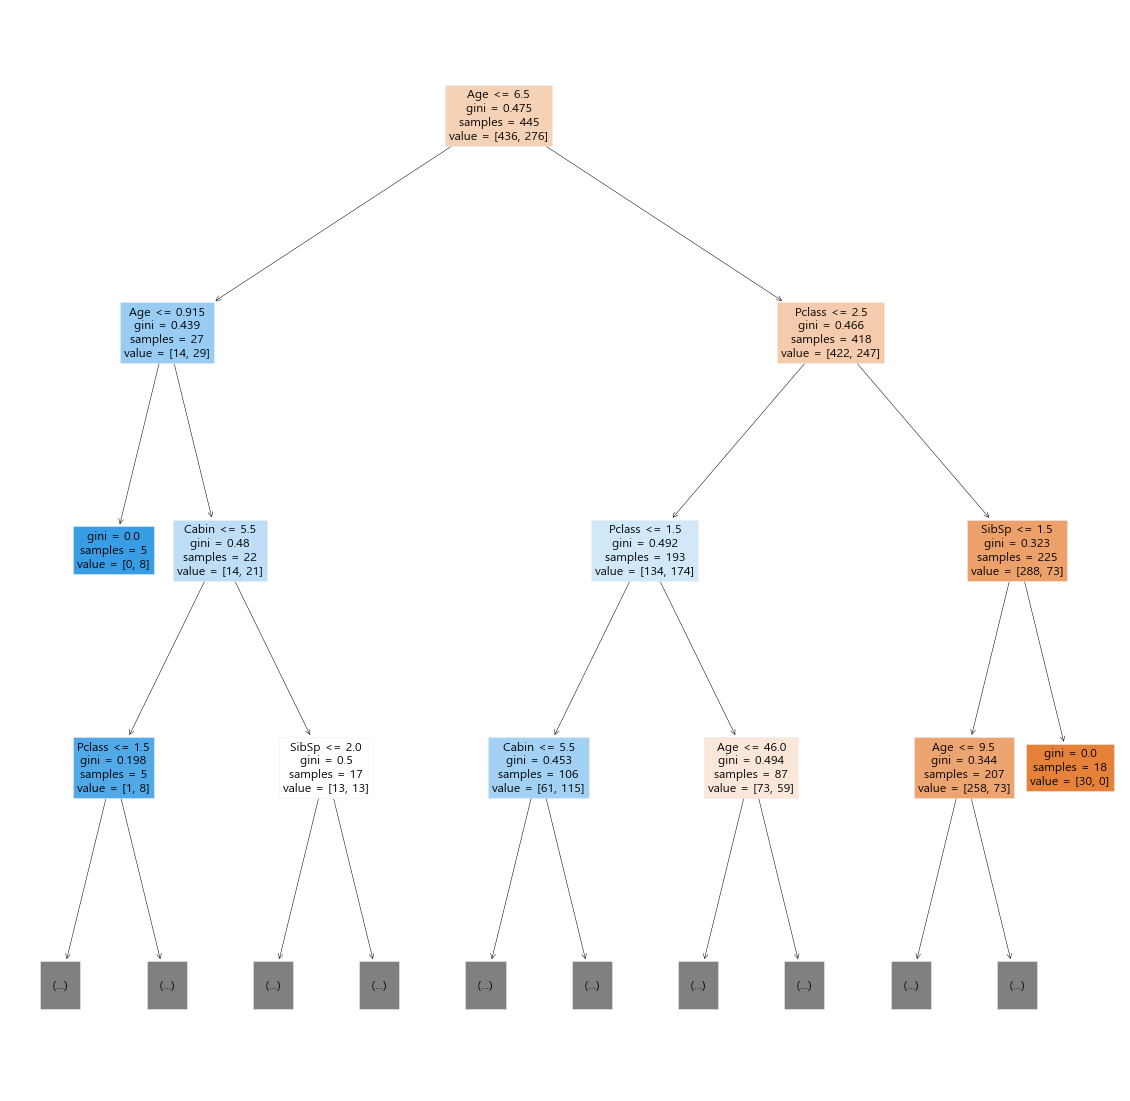

In [24]:
# 마지막 결정트리 
plt.figure(figsize=(20,20))
plot_tree(model_rf[99], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=12)
plt.show()

# 부스팅(Boosting)
- 부스팅은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법. 
- 배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측하며 여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식.
- 부스팅은 모델 간 팀워크가 이루어져 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 준다. 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복한다. 
- ADA Boosting, Gradient Boosting

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkCejr%2FbtqyghvqEZB%2F9o3rKTEsuSIDHEfelYFJlk%2Fimg.png' width='600'>



# GBM

- Gradient Boosting Machine

- max_depth	: 트리의 최대 깊이. default = 3
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수. → 과적합을 제어하는데 사용
    <br> Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수.  
    <br> min_samples_split과 함께 과적합 제어 용도.  default = 1
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수.  Default = 'none' → 모든 피처 사용
- max_leaf_nodes : 리프노드의 최대 개수.  default = None → 제한없음
- n_estimators	: 생성할 트리의 갯수. Default = 100
- learning_rate	: 학습을 진행할 때마다 적용하는 학습률(0~1). 
    <br> Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수.  Default = 0.1
    <br> 낮은 만큼 최소 오류 값을 찾아 예측성능이 높아질 수 있음. 시간이 많이 소요
- subsample	: 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1). default=1 (전체 데이터 학습)
    <br> 이 값을 조절하여 트리 간의 상관도를 줄일 수 있음

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
model_gb.score(X_train, y_train), model_rf.score(X_test, y_test)

(0.9030898876404494, 0.8435754189944135)

In [26]:
# GBM
model_gb = GradientBoostingClassifier()
parameters = {
    'n_estimators' : [50, 100, 300],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth':[3, 4, 5, 6]
}
model_gb_grid = GridSearchCV(model_gb, param_grid=parameters, cv=5,  verbose=1)
model_gb_grid.fit(X_train, y_train)
model_gb_grid.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [27]:
model_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
model_gb.fit(X_train, y_train)
model_gb.score(X_test, y_test)

0.7988826815642458

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



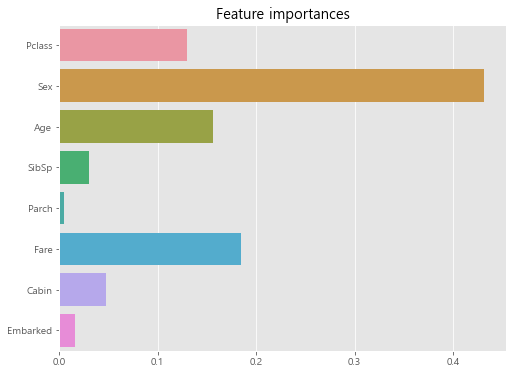

In [29]:
ftr_importances = pd.Series(model_gb.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

# XGBoost
- 트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나
- GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘
- 과적합 규제(Overfitting Regularization)
- sklearn 모듈이 아님. 별도 설치 요망 

### 설치 

- sklearn 에서 지원되지 않으므로 별도 설치가 필요 
- 관리자 버전으로 설치 
- pip install xgboost
- conda install -c anaconda py-xgboost

### 주요 파라미터 
: 트리 최적화, 부스팅, regularization 등과 관련된 파라미터를 지칭
    
```
eta -  GBM의 learning rate와 같은 파라미터 범위: 0 ~ 1
num_boost_around - 생성할 weak learner의 수
min_child_weight - GBM의 min_samples_leaf와 유사. 관측치에 대한 가중치 합의 최소. 과적합 조절 용도 범위: 0 ~ ∞
gamma - 리프노드의 추가분할을 결정할 최소손실 감소값. 값이 클수록 과적합 감소효과. 범위: 0 ~ ∞
max_depth - 트리 기반 알고리즘의 max_depth와 동일. 0을 지정하면 깊이의 제한이 없음. 너무 크면 과적합(통상 3~10정도 적용)
sub_sample - 데이터 샘플링 비율 지정(과적합 제어). 일반적으로 0.5~1 사이의 값을 사용. 범위: 0 ~ 1
colsample_bytree - GBM의 max_features와 유사. 트리 생성에 필요한 피처의 샘플링에 사용. 
                   피처가 많을 때 과적합 조절에 사용. 범위: 0 ~ 1
lambda - L2 Regularization 적용 값. 피처 개수가 많을 때 적용을 검토. 클수록 과적합 감소 효과
alpha -  L1 Regularization 적용 값. 피처 개수가 많을 때 적용을 검토. 클수록 과적합 감소 효과
scale_pos_weight - 불균형 데이터셋의 균형을 유지
```

In [30]:
import xgboost
from xgboost import plot_importance, XGBClassifier 

xgboost.__version__

'1.5.1'

### 데이터 셋 - 위스콘신 Breast Cancer 

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label

print(cancer_df.shape)
cancer_df.head(3)

In [ ]:
cancer_df['target'].value_counts()

In [ ]:
cancer_df.columns

In [ ]:
# cancer_df.isnull().sum()
cancer_df.isnull().sum().sum()

In [ ]:
cancer_df.describe()

In [ ]:

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)